# Contour ploting

In [2]:
import numpy as np
import imutils
import cv2

import matplotlib.pyplot as plt
#import matplotlib.image as mpimg

%matplotlib inline

In [3]:
def display(image):
    img_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.axis("off")
    imgplot = plt.imshow(img_rgb)

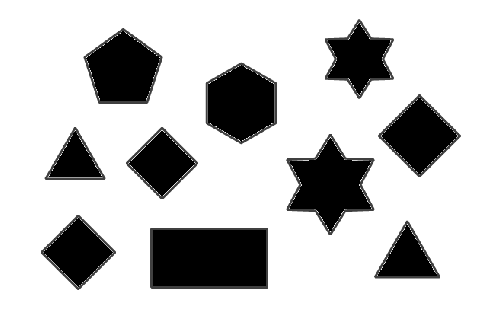

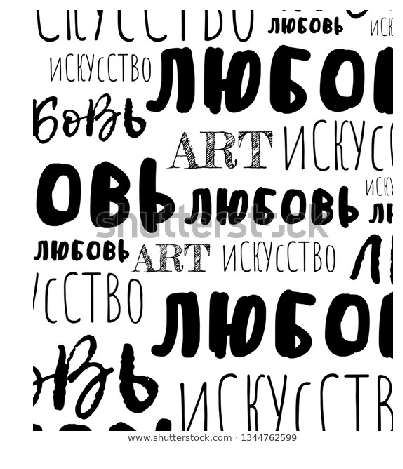

In [3]:
dir1 = 'shapes.png'
img1 = cv2.imread(dir1)

dir2 = 'poster.jpg'
img2 = cv2.imread(dir2)

display(img1)
display(img2)

# Contur ploting

**Contours** are defined as the line joining all the points along the boundary of an image that are having the same intensity. Contours come handy in shape analysis, finding the size of the object of interest, and object detection.

In [4]:
dir2 = 'poster.jpg'
img2 = cv2.imread(dir2)

dir2 = 'bboard.png'
board = cv2.imread(dir2)

Number of Contours found = 281


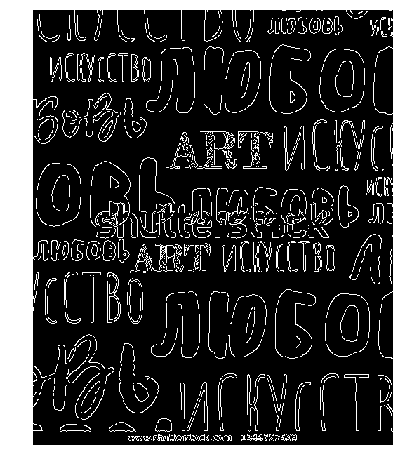

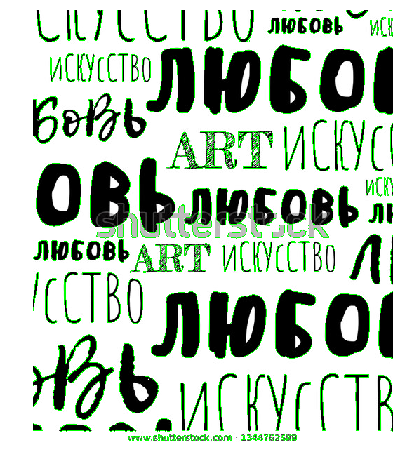

In [5]:
gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY) 
  
# Find Canny edges 
edged = cv2.Canny(gray, 30, 220)

contours, hierarchy = cv2.findContours(edged,  
cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE) 
  
display(edged)


#cv2.imshow('Canny Edges After Contouring', edged) 
#cv2.waitKey(0) 
  
print("Number of Contours found = " + str(len(contours)))  # Contours type is list 

# Draw all contours 
images = cv2.drawContours(img2, contours, -1, (0, 255, 0), 1)
display(images)


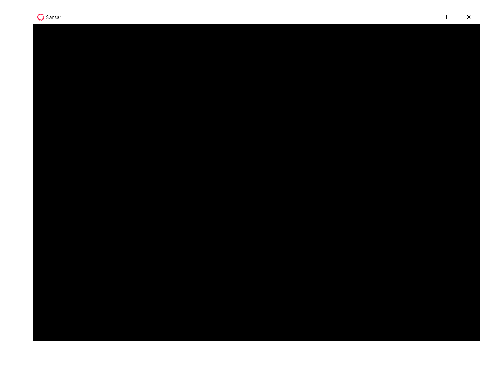

In [6]:
# Draw all contours 
images = cv2.drawContours(board, contours[100], -1, (0, 255, 0), 1)
display(images)


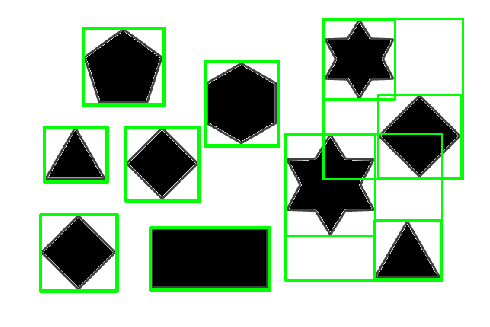

In [12]:
#looking for rectangle

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

binary = cv2.bitwise_not(gray)

(contours,_) = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for contour in contours:
    (x,y,w,h) = cv2.boundingRect(contour)
    kk = cv2.rectangle(img1, (x,y), (x+w,y+h), (0,255,0), 2)

display(kk)

## the above code is makeing rectangles,
## but we need to extract the contuor

steps

1. findContours
2. create a mask with drawContours

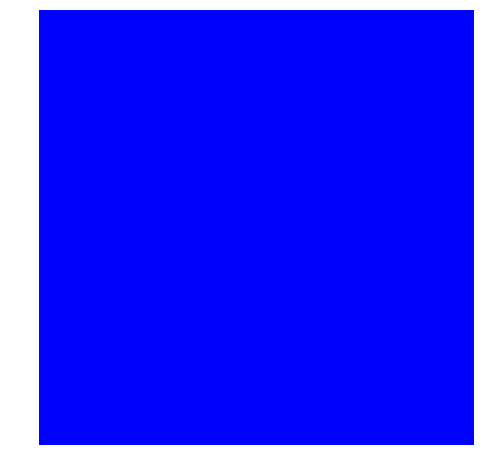

In [4]:
dir1 = 'poster.jpg'#'car.jpg'
img1 = cv2.imread(dir1)

gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

binary = cv2.bitwise_not(gray)
(contours,_) = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

for i in range(0,1):
    idx = 5 # The index of the contour that surrounds your object

    mask = np.zeros_like(img1) # Create mask where white is what we want, black otherwise

    cv2.drawContours(mask, contours, idx, 255, -1) # Draw filled contour in mask
    out = np.zeros_like(img1) # Extract out the object and place into output image
    out[mask == 255] = img1[mask == 255]

# Now crop
    (y, x, z) = np.where(mask == 255)
    (topy, topx) = (np.min(y), np.min(x))
    (bottomy, bottomx) = (np.max(y), np.max(x))
    out = out[topy:bottomy+1, topx:bottomx+1]

# Show the output image
    display(out)

[INFO] 13 unique contours found


True

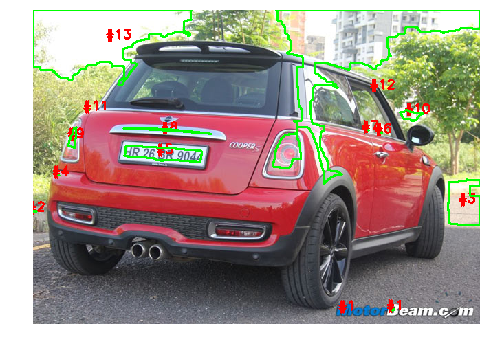

In [7]:
h, s, v = cv2.split(img)

ret, th1 = cv2.threshold(h,180,255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
kernel = np.ones((3,3), dtype = "uint8")/9
bilateral = cv2.bilateralFilter(th1, 9 , 75, 75)
erosion = cv2.erode(bilateral, kernel, iterations = 6)

#shape of the Erosion
dimensions = erosion.shape
a,b = dimensions
img_size = a*b

cv2.imwrite('car_erosion.jpg',th1)

#............................................................


# Finding the divisions
cnts = cv2.findContours(erosion.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
print("[INFO] {} unique contours found".format(len(cnts)))



# loop over the contours
for (i, c) in enumerate(cnts):
	# draw the contour
	((x, y), _) = cv2.minEnclosingCircle(c)
	cv2.putText(img, "#{}".format(i + 1), (int(x) - 10, int(y)),
		cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)
	cv2.drawContours(img, [c], -1, (0, 255, 0), 2)

# show the output image
display(img)

cv2.imwrite('Processed.jpg',img)

# Shape Detection

In [12]:
class ShapeDetector:
	def __init__(self):
		pass
	def detect(self, c):
		# initialize the shape name and approximate the contour
		shape = "unidentified"
		peri = cv2.arcLength(c, True)
		approx = cv2.approxPolyDP(c, 0.04 * peri, True)
        
        # if the shape is a triangle, it will have 3 vertices
		if len(approx) == 3:
			shape = "triangle"
		# if the shape has 4 vertices, it is either a square or
		# a rectangle
		elif len(approx) == 4:
			# compute the bounding box of the contour and use the
			# bounding box to compute the aspect ratio
			(x, y, w, h) = cv2.boundingRect(approx)
			ar = w / float(h)
			# a square will have an aspect ratio that is approximately
			# equal to one, otherwise, the shape is a rectangle
			shape = "square" if ar >= 0.95 and ar <= 1.05 else "rectangle"
		# if the shape is a pentagon, it will have 5 vertices
		elif len(approx) == 5:
			shape = "pentagon"
		# otherwise, we assume the shape is a circle
		else:
			shape = "circle"
		# return the name of the shape
		return shape


In [10]:
import argparse
import imutils
import cv2

# construct the argument parse and parse the arguments
ap = argparse.ArgumentParser()
ap.add_argument("-i", "--image", required=True,
	help="path to the input image")
args = vars(ap.parse_args())

# load the image and resize it to a smaller factor so that
# the shapes can be approximated better
image = cv2.imread(args["image"])
resized = imutils.resize(image, width=300)
ratio = image.shape[0] / float(resized.shape[0])
# convert the resized image to grayscale, blur it slightly,
# and threshold it
gray = cv2.cvtColor(resized, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(gray, (5, 5), 0)
thresh = cv2.threshold(blurred, 60, 255, cv2.THRESH_BINARY)[1]
# find contours in the thresholded image and initialize the
# shape detector
cnts = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL,
	cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
sd = ShapeDetector()




usage: ipykernel_launcher.py [-h] -i IMAGE
ipykernel_launcher.py: error: the following arguments are required: -i/--image


SystemExit: 2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2889: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [11]:
# loop over the contours
for c in cnts:
	# compute the center of the contour, then detect the name of the
	# shape using only the contour
	M = cv2.moments(c)
	cX = int((M["m10"] / M["m00"]) * ratio)
	cY = int((M["m01"] / M["m00"]) * ratio)
	shape = sd.detect(c)
	# multiply the contour (x, y)-coordinates by the resize ratio,
	# then draw the contours and the name of the shape on the image
	c = c.astype("float")
	c *= ratio
	c = c.astype("int")
	cv2.drawContours(image, [c], -1, (0, 255, 0), 2)
	cv2.putText(image, shape, (cX, cY), cv2.FONT_HERSHEY_SIMPLEX,
		0.5, (255, 255, 255), 2)
	# show the output image
	cv2.imshow("Image", image)
	cv2.waitKey(0)

NameError: name 'ratio' is not defined